In [1]:
import os
import sys
import multiprocessing
import threading
import time
import cv2
import matplotlib.pyplot as plt

In [2]:
#Function to convert the image to greyscale

def task(path):
    image = cv2.imread(path)   
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [3]:
#normal function that takes in list of paths and greyscales each path

def normal(paths):
    for i in paths:
        task(i)

In [4]:
#Creating a multithreading function that takes in the maximum number of threads at a time and the list of image paths

def threaded_greyscale(paths, thread_num):
    activethreads=threading.active_count()
    
    for i in paths:
        t=threading.Thread(target=task, args=(i,))
        t.start()
        
        while True:
            if threading.active_count()-activethreads<thread_num:
                break
            time.sleep(0.01)
    while True:
        if threading.active_count()==activethreads:
            break
        time.sleep(0.02)

In [5]:
paths=[r"./Stock/butterfly.jpg", r"./Stock/bird.jpg", r"./Stock/ice.jpg", r"./Stock/lizard.jpg", r"./Stock/lofoten.jpg",
       r"./Stock/money.jpg", r"./Stock/moon.jpg", r"./Stock/sunset.jpg", r"./Stock/los-angeles.jpg"
       , r"./Stock/blossom.jpg"]*100

In [6]:
start_time=time.time()
normal(paths)
normal_time=time.time()-start_time

start_time=time.time()
threaded_greyscale(paths, 3)
threaded_time=time.time()-start_time

In [7]:
print("Normal Time: ", normal_time, end="\n")
print("Using 3 Threads: ", threaded_time)

Normal Time:  20.512569427490234
Using 3 Threads:  11.611054182052612


In [8]:
x_pts=[i for i in range(1, 16)]
y_pts=[]

for i in x_pts:
    start_time=time.time()
    threaded_greyscale(paths, i)
    threaded_time=time.time()-start_time
    y_pts.append(threaded_time)

Text(0.5, 1.0, 'Number of threads vs Time')

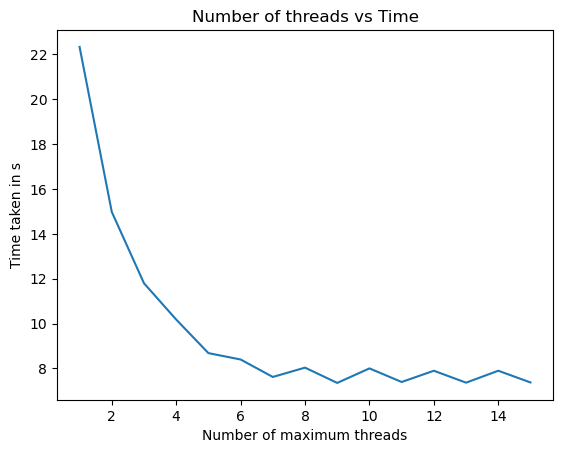

In [9]:
plt.plot(x_pts, y_pts)
plt.xlabel("Number of maximum threads")
plt.ylabel("Time taken in s")
plt.title("Number of threads vs Time")